In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def matrix_n_kap(n, kappa):
    vals = np.concatenate([np.array([1, kappa]), np.random.uniform(1, kappa, size=n-2)])
    matrix = np.diag(vals)
    
    return matrix


def vector_n(n):
    return np.random.uniform(-10, 10, size=n)


def f(x, a, b):
    return 0.5 * x.T @ a @ x + b.T @ x


def grad(x, a, b):
    return x.T @ a + b


def norm2(x):
    return np.sqrt(np.sum(x**2))

In [3]:
n = 10
kappa = 10

a = matrix_n_kap(n=n, kappa=kappa)
b = vector_n(n=n)

In [4]:
f(np.array(range(10)), a, b)

1051.3935798984628

In [5]:
grad(np.array(range(10)), a, b)

array([ 9.72192119,  5.10614863, 12.98361275, 22.79885862, 29.52245992,
       31.57705951, 55.7765636 , 22.10176058, 73.60680877, 85.50794241])

In [6]:
norm2(np.array([1,2,3]))

3.7416573867739413

In [7]:
def armiho(xk, a, b, alpha, eps = 0.01):
    while f(xk - alpha * grad(xk, a, b), a, b) - f(xk, a, b) > eps * alpha * grad(xk, a, b) @ grad(xk, a, b):
        alpha *= 0.5
    return alpha

In [8]:
def gard_des(x0, eps, a, b):
    xt = x0.copy()
    alpha = 0.002
    n = 0
    yt_h = []
    
    while norm2(grad(xt, a, b)) / norm2(grad(x0, a, b)) > eps:
        cur_alpha = armiho(xt, a, b, alpha, eps=0.01)
        xt -= alpha * grad(xt, a, b)
        n += 1
        yt_h.append(f(xt, a, b))
            
    return yt_h

In [9]:
def all_samples(n, kappa, x0, eps):
    a = matrix_n_kap(n=n, kappa=kappa)
    b = vector_n(n=n)
    
    return gard_des(x0, eps, a, b)

In [10]:
def result(eps):
    N = [2, 10, 10**3]
    KAPPA = [1, 100, 10**4]
    fig, axes = plt.subplots(nrows=len(N), ncols=len(KAPPA), figsize=(10, 10))
    
    for i, n in enumerate(N):
        x0_a = np.random.uniform(-100, 100, size=n)
        x0_b = np.random.uniform(-100, 100, size=n)
        x0_c = np.random.uniform(-100, 100, size=n)
        for j, kappa in enumerate(KAPPA):
            y_a = all_samples(n, kappa, x0_a, eps)
            axes[i, j].plot(y_a)
            y_b = all_samples(n, kappa, x0_b, eps)
            axes[i, j].plot(y_b)
            y_c = all_samples(n, kappa, x0_c, eps)
            axes[i, j].plot(y_c)
            axes[i, j].set_title(f"n = {n}, kappa = {kappa}")

    return fig

In [12]:
eps_a = 0.1
eps_b = 0.5

<ipython-input-2-5ccf8c7d3e58>:21: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(x**2))
<ipython-input-2-5ccf8c7d3e58>:13: RuntimeWarning: overflow encountered in matmul
  return 0.5 * x.T @ a @ x + b.T @ x
<ipython-input-7-3916b4e014a3>:2: RuntimeWarning: invalid value encountered in double_scalars
  while f(xk - alpha * df(xk, a, b), a, b) - f(xk, a, b) > eps * alpha * df(xk, a, b) @ df(xk, a, b):
<ipython-input-7-3916b4e014a3>:2: RuntimeWarning: overflow encountered in matmul
  while f(xk - alpha * df(xk, a, b), a, b) - f(xk, a, b) > eps * alpha * df(xk, a, b) @ df(xk, a, b):
<ipython-input-2-5ccf8c7d3e58>:17: RuntimeWarning: overflow encountered in matmul
  return x.T @ a + b
<ipython-input-2-5ccf8c7d3e58>:13: RuntimeWarning: invalid value encountered in matmul
  return 0.5 * x.T @ a @ x + b.T @ x
<ipython-input-2-5ccf8c7d3e58>:17: RuntimeWarning: invalid value encountered in matmul
  return x.T @ a + b
/Users/a18502538/anaconda3/lib/python3.8/site-packages

<Figure size 1080x720 with 0 Axes>

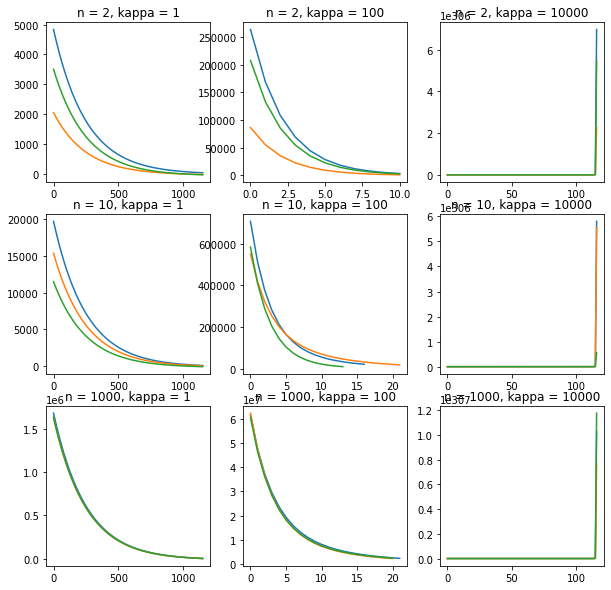

In [13]:
fig_a = result(eps_a)

<ipython-input-2-5ccf8c7d3e58>:21: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(x**2))
<ipython-input-2-5ccf8c7d3e58>:13: RuntimeWarning: overflow encountered in matmul
  return 0.5 * x.T @ a @ x + b.T @ x
<ipython-input-7-3916b4e014a3>:2: RuntimeWarning: invalid value encountered in double_scalars
  while f(xk - alpha * df(xk, a, b), a, b) - f(xk, a, b) > eps * alpha * df(xk, a, b) @ df(xk, a, b):
<ipython-input-7-3916b4e014a3>:2: RuntimeWarning: overflow encountered in matmul
  while f(xk - alpha * df(xk, a, b), a, b) - f(xk, a, b) > eps * alpha * df(xk, a, b) @ df(xk, a, b):
<ipython-input-2-5ccf8c7d3e58>:17: RuntimeWarning: overflow encountered in matmul
  return x.T @ a + b
<ipython-input-2-5ccf8c7d3e58>:13: RuntimeWarning: invalid value encountered in matmul
  return 0.5 * x.T @ a @ x + b.T @ x
<ipython-input-2-5ccf8c7d3e58>:17: RuntimeWarning: invalid value encountered in matmul
  return x.T @ a + b


<Figure size 1080x720 with 0 Axes>

/Users/a18502538/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2161: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


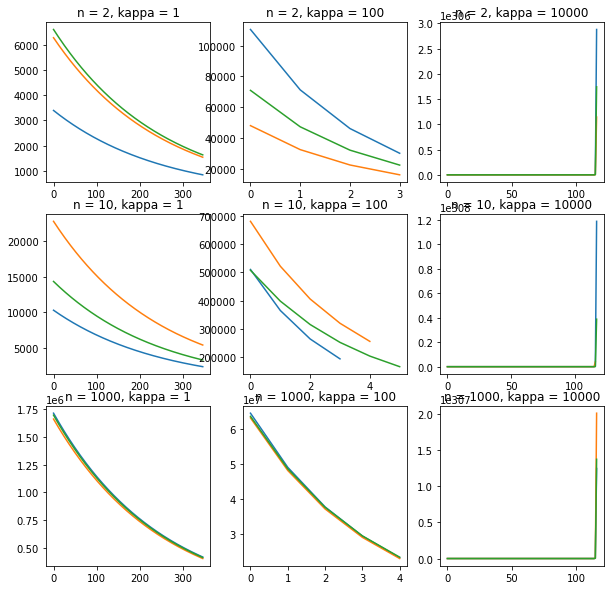

In [14]:
fig_b = result(eps_b)